<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd

In [3]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [7]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [9]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [14]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().transpose()

In [ ]:
df['loan_status'].value_counts()[0]/(df['loan_status'].value_counts()[0]+df['loan_status'].value_counts()[1])

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

In [ ]:
sns.countplot(x='loan_status',data=df)

**TASK: Create a histogram of the loan_amnt column.**

In [ ]:
plt.figure(figsize=(12,3))
sns.histplot(df['loan_amnt'], bins=30)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [ ]:
df.corr(numeric_only=True)

**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

In [ ]:
plt.figure(figsize=(9,10))
sns.heatmap(df.corr(numeric_only=True),cmap='viridis',annot=True)

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

In [ ]:
df[['loan_amnt','installment']].describe().transpose()

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

In [ ]:
df.columns

In [ ]:
sns.boxplot(x="loan_status", y="loan_amnt",  hue='loan_status',data=df,palette='rainbow')

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [ ]:
df[['loan_amnt','installment']].describe().transpose()

In [ ]:
df.groupby("loan_status")["loan_amnt"].describe()


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [ ]:
df['grade'].value_counts().sort_index()

In [ ]:
sorted(set(df['sub_grade']))

In [ ]:
df['sub_grade'].value_counts().sort_index()

In [ ]:
len(set(df['sub_grade']))

In [ ]:
df[['grade','sub_grade']].describe()

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

In [ ]:
sns.countplot(x='grade',hue='loan_status',data=df)

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',palette = 'rainbow',data=df, order=sorted(df['sub_grade'].unique()))

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',hue='loan_status',palette = 'viridis',data=df, order=sorted(df['sub_grade'].unique()))

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [ ]:
fG_sub = df[df['sub_grade'].str.startswith(('F', 'G'))]

In [ ]:
fG_sub

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',hue='loan_status',palette = 'viridis',data=fG_sub, order=sorted(fG_sub['sub_grade'].unique()))

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [16]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0) #this only works because there are no missing values

**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [ ]:
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

In [ ]:
cor_val = df.corr(numeric_only=True)['loan_repaid'][:-1].sort_values()
#how instructor did it: df.df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')


In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=cor_val.index, y=cor_val.values)
plt.xticks(rotation=90)
plt.show()

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [ ]:
df.head()

# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [ ]:
df.shape

**TASK: Create a Series that displays the total count of missing values per column.**

In [ ]:
df.isnull().sum()

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [ ]:
(df.isnull().sum() / len(df)) * 100


**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [ ]:
feat_info('emp_title')


In [ ]:
feat_info('emp_length')

**TASK: How many unique employment job titles are there?**

In [ ]:
len(set(df['emp_title']))

In [ ]:
df['emp_title'].value_counts()

In [ ]:
df[['emp_title']].describe()

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [18]:
df = df.drop('emp_title',axis=1)

In [ ]:
df.info()

In [ ]:
df['emp_length'].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',palette = 'rainbow',data=df)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [ ]:
order_pref = ['< 1 year',
              '1 year',
              '2 years',
              '3 years',
              '4 years',
              '5 years',
              '6 years',
              '7 years',
              '8 years',
              '9 years',
              '10+ years']

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',hue = 'loan_repaid',palette = 'rainbow',data=df, order=order_pref)

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',hue = 'loan_status',palette = 'rainbow',data=df, order=order_pref)

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [ ]:
# CODE HERE

In [ ]:
(df.isnull().sum() / len(df)) * 100

In [ ]:
#df.groupby("loan_status")["emp_length"].value_counts().sort_index()
series_1 = pd.crosstab(df['emp_length'], df['loan_status'])

In [ ]:
series_1.columns

In [ ]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [ ]:
emp_co

In [ ]:
series_1['perc_co'] = (series_1['Charged Off']/series_1['Fully Paid'])

In [ ]:
series_1

In [ ]:
series_1 = series_1.reset_index()


In [ ]:
series_1['perc_co'] = (series_1['Charged Off']/series_1['Fully Paid'])

In [ ]:
series_1

In [ ]:
import seaborn as sns

# Assuming 'series_1' is your DataFrame and 'order_pref' is your desired order for emp_length
plt.figure(figsize=(12, 6))
sns.barplot(x='emp_length', y='perc_co', palette='rainbow', data=series_1, order=order_pref)

plt.title('Percentage of Charge-Offs by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Percentage of Charge-Offs')

plt.xticks(rotation=45)  # Optional: Rotate x labels for better readability
plt.tight_layout()  # Optional: Adjust layout to fit everything
plt.show()

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [20]:
df = df.drop('emp_length',axis=1)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [ ]:
df.info()

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [ ]:
feat_info('title')

In [ ]:
feat_info('purpose')

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [22]:
df = df.drop('title',axis=1)

In [24]:
(df.isnull().sum() / len(df)) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [ ]:
feat_info('mort_acc')

**TASK: Create a value_counts of the mort_acc column.**

In [ ]:
df['mort_acc'].value_counts()

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [ ]:

cor_val = df.corr(numeric_only=True)['mort_acc'][:-1].sort_values()


In [ ]:
cor_val

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [ ]:
df.groupby('total_acc')['mort_acc'].mean() #syntax of video is deprecated and ['mort_acc']comes after grouping column

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [26]:
ta_average = df.groupby('total_acc')['mort_acc'].mean()

In [28]:
ta_average[2.0]

0.0

In [30]:
df['mort_acc'] = df.apply(
    lambda row: ta_average[row['total_acc']] if pd.isnull(row['mort_acc']) else row['mort_acc'], 
    axis=1
)

In [ ]:
#instructor choice:
# def fill_mort_acc(total_acc,mort_acc):
#     if np.isnan(mort_acc):
#         return ta_average[total_acc]
#     else:
#         return mort_acc

In [32]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [35]:
df = df.dropna()

In [37]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [39]:
df.shape

(395219, 25)

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [42]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [45]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [47]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [49]:
df.loc[:, 'term'] = df['term'].apply(lambda x: 36 if x.strip() == '36 months' else 60)
 #this only works because there are no missing values. Also df.loc[:,'variable_of_interest']=....is the correct formatting for this type of change

In [51]:
#instructor: df['term'].apply(lambda term: int(term[:3])) which grabs upto the 3rd placement but not including which is the space

In [53]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [56]:
df = df.drop('grade',axis=1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [59]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [61]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [63]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [66]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)

In [68]:
df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [70]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [73]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [76]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER') #replace replaces string values w/strings

In [78]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [80]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [83]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [85]:
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [91]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [93]:
df = df.drop('address',axis=1)

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [96]:
feat_info('issue_d')

The month which the loan was funded


In [98]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [101]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [103]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [105]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [107]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [112]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [115]:
# CODE HEdf.RE

In [121]:
df['term'] = pd.to_numeric(df['term'])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   earliest_cr_line                     395219 non-null  int64  
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc         

In [125]:
df = df.drop('loan_status',axis=1)

**TASK: Set X and y variables to the .values of the features and label.**

In [131]:
df.shape

(395219, 79)

In [ ]:
# df = df.drop('address',axis=1)

In [134]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [ ]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [140]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
scaler = MinMaxScaler()

In [144]:
X_train = scaler.fit_transform(X_train)

In [145]:
# X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [150]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [153]:
X_train.shape 

(316175, 78)

# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()

In [175]:
# CODE HERE
model = Sequential()
model.add(Dense(units=78,activation='relu')) #first layer matches the number of features (used shape on training above)
model.add(Dropout(0.20))


model.add(Dense(units=39,activation='relu'))  #second layer approximately half 1st layer 
model.add(Dropout(0.20))

model.add(Dense(units=19,activation='relu'))  #third layer approximately half 2nd layer 
model.add(Dropout(0.20))

# model.add(Dense(units=9,activation='relu'))  #all additional hidden layers should halve previous layer until reasonable
# model.add(Dropout(0.20))

model.add(Dense(units=1,activation='sigmoid')) #binary last has to be sigmoid and is 1 node 
#model.add(Dropout(0.20)) no drop out on the model final node

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')


**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [191]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size = 256, # size of data set makes it recommended to do in batches
          validation_data=(X_test, y_test), 
          verbose=1
          )

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2553 - val_loss: 0.2617
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2555 - val_loss: 0.2612
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2546 - val_loss: 0.2611
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2555 - val_loss: 0.2615
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2545 - val_loss: 0.2614
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2548 - val_loss: 0.2610
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2558 - val_loss: 0.2611
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2561 - val_loss: 0.2611
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2541 - val_loss: 0.2616
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2535 - val_loss: 0.2610
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2540 - val_loss: 0.2610
Epoch 12/25
1236/1236 ━━━━━━━━

**TASK: OPTIONAL: Save your model.**

In [ ]:
# CODE HERE

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

<Axes: >

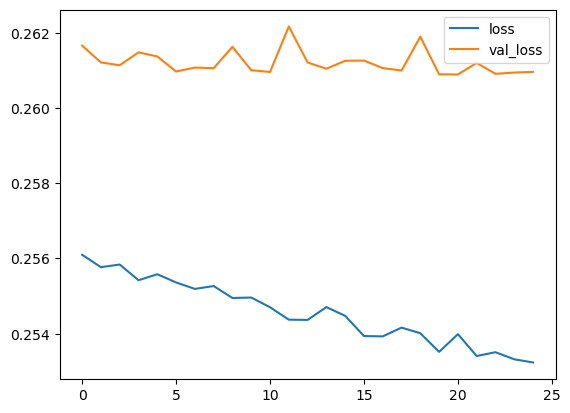

In [193]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [195]:
# predictions = model.predict_classes(X_test) prediction_class is depricated
predictions = model.predict(X_test)

# Get the class with the highest probability (argmax)
predictions = np.argmax(predictions, axis=1)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step


In [197]:
from sklearn.metrics import classification_report,confusion_matrix

In [199]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33     15658
           1       0.00      0.00      0.00     63386

    accuracy                           0.20     79044
   macro avg       0.10      0.50      0.17     79044
weighted avg       0.04      0.20      0.07     79044



C:\Users\miked\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miked\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miked\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**TASK: Given the customer below, would you offer this person a loan?**

In [173]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer



loan_amnt      25000.0
term                60
int_rate         18.24
installment     638.11
annual_inc     61665.0
                ...   
30723             True
48052            False
70466            False
86630            False
93700            False
Name: 305323, Length: 78, dtype: object

In [ ]:
model.predict_classes(new_customer.values.reshape(1,78))

**TASK: Now check, did this person actually end up paying back their loan?**

In [ ]:
df.iloc[random_ind]['loan_repaid']

# GREAT JOB!